<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Life Expectancy Data)

The dataset contains the health data of 2938 individuals useful for predicting the life expentency of the individuals. The features are related to economical factors, immunity realted factors, social factors and so on.

Attribute Information:

**Country:** Country of the recorded data

**Year:** Year of the recorded data

**Status:** Status of the country

**Life expectancy:** Life expectancy in age (target/dependent variable)

**Adult mortality:** Rate of adult mortality

**Infant deaths:** Number of Infant Deaths per 1000 population

**Alcohol:** Alcohol consumption (in litres of pure alcohol)

**Percentage expenditure:** Expenditure on health as a percentage of GDP

**Hepatitis B:** Hepatitis B immunization coverage among 1-year-olds (%)

**Measles:** Number of reported cases per 1000 population

**BMI:** Average BMI of entire population

**Under-five deaths:** Number of under-five deaths per 1000 population

**Polio:** Polio immunization coverage among 1-year-olds (%)

**Total expenditure:** Government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria:** DTP3 immunization coverage among 1-year-olds (%)

**HIV/AIDS:** Deaths per 1000 live births HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Thinness 1-19 years:** Prevalence of thinness for age 1 to 19 (%)

**Thinness 5-9 years:** Prevalence of thinness for age 5 to 9 (%)

**Income composition of resources:** Human Development Index in terms of income composition of resources

**Schooling:** Number of years of Schooling

**Import the required libraries**

In [34]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from sklearn.model_selection import train_test_split
tts = train_test_split

#### Load the life expectancy dataset and print the first five observations

In [2]:
# type your code here
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Check the data type of each variable and if any variable is wrongly identified, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2922 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Create a DataFrame containing the count and percentage of missing entries in each variable</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here
df2 = df.isnull().sum()
df2a = pd.DataFrame(df2)
df2a['percent'] = (df.isnull().sum()/len(df))*100
df2a

,0,percent
Country,0,0.000000
Year,0,0.000000
Status,16,0.544588
Life expectancy,10,0.340368
Adult mortality,10,0.340368
Infant deaths,0,0.000000
Alcohol,194,6.603131
Percentage expenditure,0,0.000000
Hepatitis B,553,18.822328
Measles,0,0.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3a. Are there any extreme values present in the government's total expenditure on health?
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

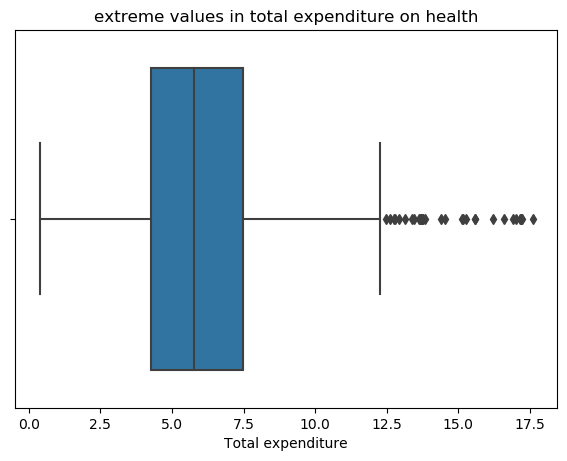

In [22]:
# type your code here
plt.figure(figsize = (7,5),dpi = 100)
sns.boxplot(df['Total expenditure'])
plt.title('extreme values in total expenditure on health')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3b. Remove the outliers present in 'Total expenditure' using the quartiles of the variable	
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here
teq1 = df['Total expenditure'].quantile(0.25)
teq3 = df['Total expenditure'].quantile(0.75)
iqr = teq3 - teq1
ul = teq3 + 1.5*iqr
ll = teq1 - 1.5*iqr
len(df[(df['Total expenditure'] < -3) | (df['Total expenditure'] > 3)])

2408

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Split the data such that 'X' will contain all the indepentdent variables and 'y' will contain the target variable</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Hint:** 'Life expectancy' is the target variable depending on the remaining variables.

In [31]:
# type your code here
y = df['Life expectancy']
x = df.drop(columns = 'Life expectancy')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Split the independent variables into two sets with the proportion of 70:30</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# type your code here
xTrain, XTest, yTrain, YTest = tts(x,y,test_size = 0.3, random_state = 0)
print('xTrain:',xTrain.shape)
print('XTest:',XTest.shape)
print('yTrain',yTrain.shape)
print('YTest',YTest.shape)

xTrain: (2056, 21)
XTest: (882, 21)
yTrain (2056,)
YTest (882,)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. How would you treat the missing values in the variable 'GDP'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# type your code here
print('percentage of null values in GDP: ',(df['GDP'].isnull().sum()/len(df))*100)
print('The skewness of GDP is: ',df['GDP'].skew())
df['GDP'] = df['GDP'].fillna(df['GDP'].median())
print('Since the values are highly skewed the missing values can be filled with the median of GDP')

percentage of null values in GDP:  0.0
The skewness of GDP is:  3.543755873452576
Since the values are highly skewed the missing values can be filled with the median of GDP


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.There are 16 observations for which the status of the corresponding country is unknown, impute this status with an appropriate values</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
# type your code here
print(df['Status'].isnull().sum()/len(df) * 100)
print('Since the null values are less than 5% the rows contaiing the null values can be dropped.')
df['Status'] = df['Status'].dropna()

0.5445881552076242
Since the null values are less than 5% the rows contaiing the null values can be dropped.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Define a function to find the extreme values in alcohol consumption
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
# type your code here
def funct(data,col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    print(df[(data[col_name]< ll) | (data[col_name] > ul)])

funct(df,'Alcohol')

Empty DataFrame
Columns: [Country, Year, Status, Life expectancy, Adult mortality, Infant deaths, Alcohol, Percentage expenditure, Hepatitis B, Measles, BMI, Under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, Thinness  1-19 years, Thinness 5-9 years, Income composition of resources, Schooling]
Index: []

[0 rows x 22 columns]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a column 'Life_expectancy_level' such that it will contain three levels (High, Medium, Low) based on the life expectancy </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
# type your code here
df['Life_expectancy_level'] = pd.cut(df['Life expectancy'],3,labels = ['High','Medium','Low'])
df.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Life_expectancy_level
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,Medium
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582,17.5,17.5,0.476,10.0,Medium
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688,17.7,17.7,0.470,9.9,Medium
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958,17.9,18.0,0.463,9.8,Medium
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599,18.2,18.2,0.454,9.5,Medium


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Check how life expectancy has changed over the years in China</b>
                </font>
            </div>
        </td>
    </tr>
</table>

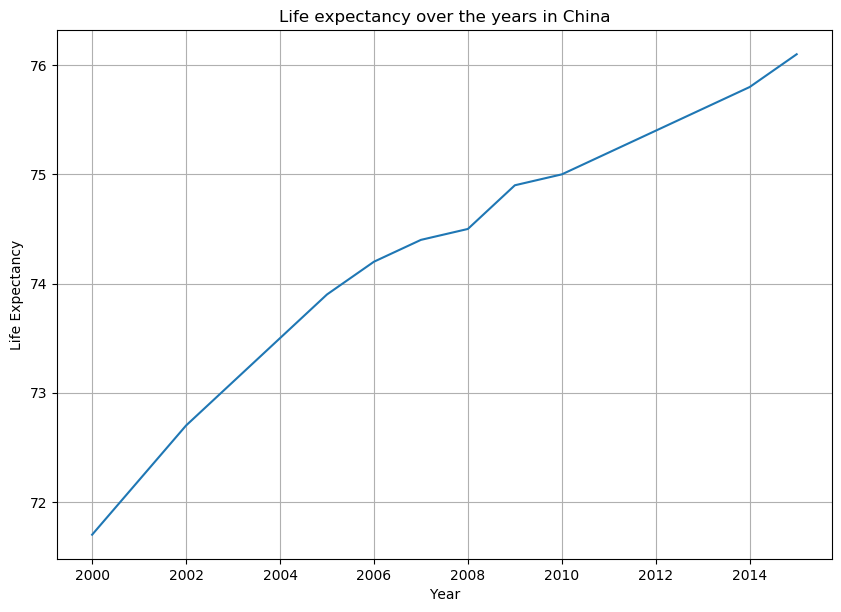

In [57]:
# type your code here
r = df[['Country','Year','Life expectancy']]
plt.figure(figsize = (10,7),dpi = 100)
plt.title('Life expectancy over the years in China')
r.groupby(['Country','Year'])['Life expectancy'].sum()['China'].plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid()
plt.show()